# **Seaborn**
Es una librería que envuelve el matplotlib de bajo nivel, permitiendo integrar gráficos con
estructuras de datos de NumPy y pandas, y con rutinas estadísticas de
SciPy y StatModels. Todo ello con un especial cuidado por la estética,
gracias a temas incorporados, y a paletas de colores especialmente
pensadas para revelar patrones en los datos.

There are five preset themes in Seaborn:
* darkgrid  (default)
* whitegrid
* dark
* white
* ticks

In [1]:
import seaborn as sns

# establecer el estilo Seaborn como el estilo matplotlib por defecto
# (gráficos visualmente más atractivos)
sns.set()

# Activar  uno de los 5 temas
sns.set_style('whitegrid')

# usar solo el tema para unos comandos
with sns.axes_style('whitegrid'):
    # Your plot commands here
    pass


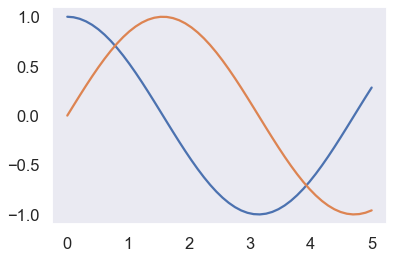

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Una determinada escala de gráfico (que implica diferentes grosores de líneas, tamaño de fuentes,
#  etc.) se denomina contexto
sns.set_context("talk")

x = np.linspace(0, 5, 50)
y_cos = np.cos(x)
y_sin = np.sin(x)

with sns.axes_style('dark'):
    plt.figure()
    plt.plot(x, y_cos)
    plt.plot(x, y_sin)
    plt.show()
sns.set()


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


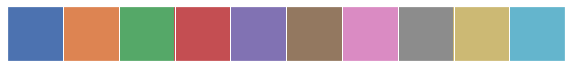

In [3]:
# ver  y modificar los colores de  current palette ( las posibilidades son )
# deep  muted bright  pastel  dark  colorblind
current_palette = sns.color_palette()
print(current_palette)
sns.palplot(current_palette)


## Mejorando EDA

In [4]:
"""cagar el  conjuntos de datos de Iris en DataFrame"""

import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

features_iris = [a[:-5].replace(' ', '_') for a in iris.feature_names]
target_labels = {j: flower for j, flower in enumerate(iris.target_names)}

df_iris = pd.DataFrame(X_iris, columns=features_iris) 
df_iris['target'] = [target_labels[y] for y in y_iris]
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
"""cagar el  conjuntos de datos de Boston en DataFrame"""

from sklearn.datasets import load_boston
boston = load_boston()
X_boston, y_boston = boston.data, boston.target
features_boston = np.array(['V'+'_'.join([str(b), a])
                            for a, b in zip(boston.feature_names,
                                            range(len(boston.feature_names)))])

df_boston = pd.DataFrame(X_boston, columns=features_boston)
df_boston['target'] = y_boston

# Quantile-based discretization function para obtner una variable con tres categorias que
# representan los precios más bajos, medios y altos
df_boston['target_level'] = pd.qcut(y_boston, 3)


In [6]:
df_boston.head(7)

,V0_CRIM,V1_ZN,V2_INDUS,V3_CHAS,V4_NOX,V5_RM,V6_AGE,V7_DIS,V8_RAD,V9_TAX,V10_PTRATIO,V11_B,V12_LSTAT,target,target_level
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,"(23.7, 50.0]"
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,"(18.833, 23.7]"
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,"(23.7, 50.0]"
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,"(23.7, 50.0]"
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,"(23.7, 50.0]"
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,"(23.7, 50.0]"
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,"(18.833, 23.7]"


Seaborn puede ayudarle a explorar sus datos averiguando
cómo se relacionan las variables  categóricas con las
numéricas. Para ello se utiliza la función **catplot**

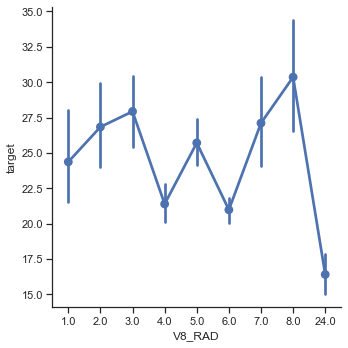

In [7]:
with sns.axes_style('ticks'): 
    sns.catplot(data=df_boston, x='V8_RAD', y='target', kind='point')

Comparación sea entre variables numéricas; Seaborn ofrece un gráfico de dispersión mejorado con una
tendencia de curva ajustada por regresión incorporada, que puede darle
pistas sobre posibles transformaciones de los datos cuando la relación noes lineal:

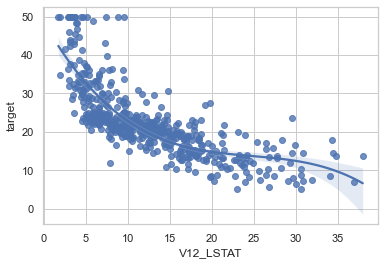

In [8]:
with sns.axes_style("whitegrid"): 
    sns.regplot(data=df_boston, x='V12_LSTAT', y="target", order=3)


Para considerar también las distribuciones, *jointplot* proporcionará gráficos adicionales al lado del gráfico de dispersión

c:\Users\Manue!_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


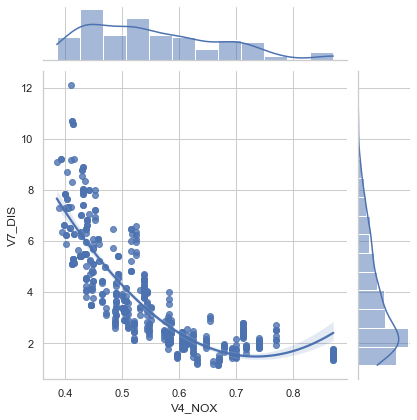

In [17]:
with sns.axes_style("whitegrid"): 
    sns.jointplot("V4_NOX", "V7_DIS",  data=df_boston, kind='reg', order=2)

Describir diferencias entre las clases para dos variable en un grafico de dispersión

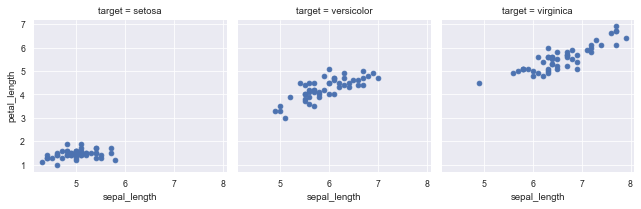

In [27]:
with sns.axes_style("darkgrid"): 
    sns.set_context("paper")
    chart = sns.FacetGrid(df_iris, col="target") 
    chart.map(plt.scatter, "sepal_length", "petal_length")

Ver la distribucion de una caracteristica en cada clase

c:\Users\Manue!_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Manue!_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Manue!_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

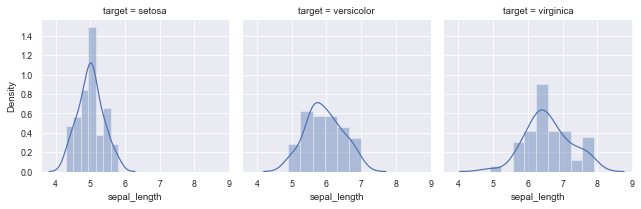

In [31]:
with sns.axes_style("darkgrid"):
    chart = sns.FacetGrid(df_iris, col="target")
    chart.map(sns.distplot, "sepal_length")

Matriz de graficos de dispersion si el numero de variables no es muy elevado

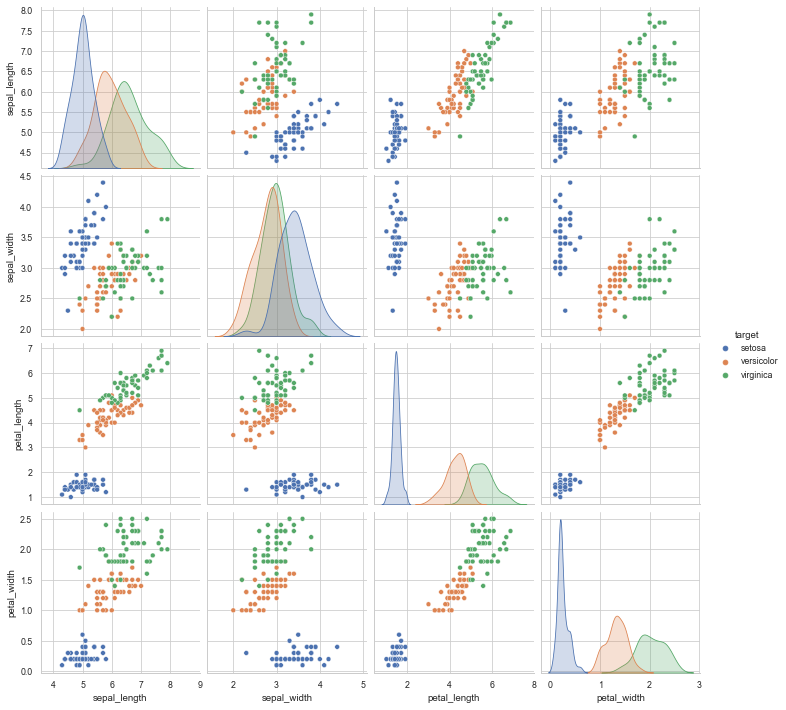

In [38]:
with sns.axes_style("whitegrid"): 
    # hue es para definir los grupos
    chart = sns.pairplot(data=df_iris, hue="target", diag_kind="kde") 